In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
import matplotlib.pyplot as plt

In [3]:
# David's version
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [21]:
campaign = campaign.dropna()

# turn objects into dummies or integers if we can
cat_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
            'month', 'poutcome']
for cat in cat_list:
    int_name = str(cat) + "_int"
    campaign[int_name] = campaign[cat].astype("category").cat.codes
    
pd.get_dummies(campaign, columns = cat_list, drop_first= False)

X = campaign[['age', 'job_int', 'marital_int', 'education_int', 'default_int', 'housing_int', 'loan_int', 'contact_int',
            'month_int', 'campaign', 'pdays','previous','poutcome_int', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx','euribor3m','nr.employed']]
y = campaign[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
best_clf = DecisionTreeClassifier(max_depth = 8)
best_clf.fit(X_train, y_train)
top_score = best_clf.score(X_test, y_test)

0.8970865929322903


In [23]:
# TAKES 2 MINUTES TO RUN \/
for i in range(1000):
    clf = DecisionTreeClassifier(max_depth = 8)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    if score > top_score:
        best_clf = clf
        top_score = score
        print(score)

[Text(0.5, 0.9166666666666666, 'x[17] <= 5087.65\ngini = 0.201\nsamples = 29655\nvalue = [26285, 3370]'),
 Text(0.25, 0.75, 'x[10] <= 16.5\ngini = 0.495\nsamples = 3603\nvalue = [1974.0, 1629.0]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[14] <= 92.29\ngini = 0.409\nsamples = 883\nvalue = [253, 630]'),
 Text(0.0625, 0.4166666666666667, 'x[16] <= 0.865\ngini = 0.498\nsamples = 104\nvalue = [49, 55]'),
 Text(0.03125, 0.25, 'x[0] <= 77.0\ngini = 0.401\nsamples = 36\nvalue = [10, 26]'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'x[6] <= 0.5\ngini = 0.489\nsamples = 68\nvalue = [39, 29]'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'x[9] <= 3.5\ngini = 0.387\nsamples = 779\nvalue = [204.0, 575.0]'),
 Text(0.15625, 0.25, 'x[16] <= 0.925\ngini = 0.369\nsamples = 718\n

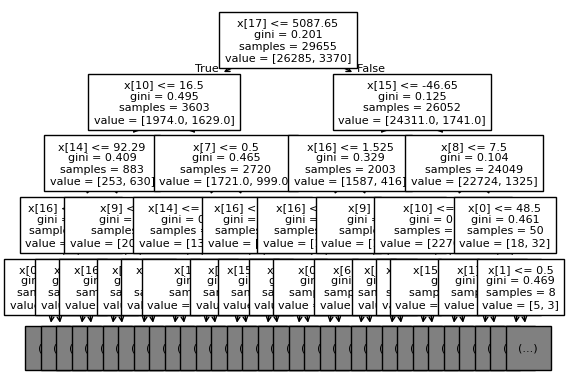

In [22]:
clf = best_clf
fig_clf, ax_clf = plt.subplots(figsize=(20,20))
tree.plot_tree(clf, fontsize=8, feature_names = X.columns)
plt.show()

In [25]:
import matplotlib.pyplot as plt
import itertools

In [47]:
ys = campaign['y'].value_counts()
ys.head()

y
no     32861
yes     4208
Name: count, dtype: int64

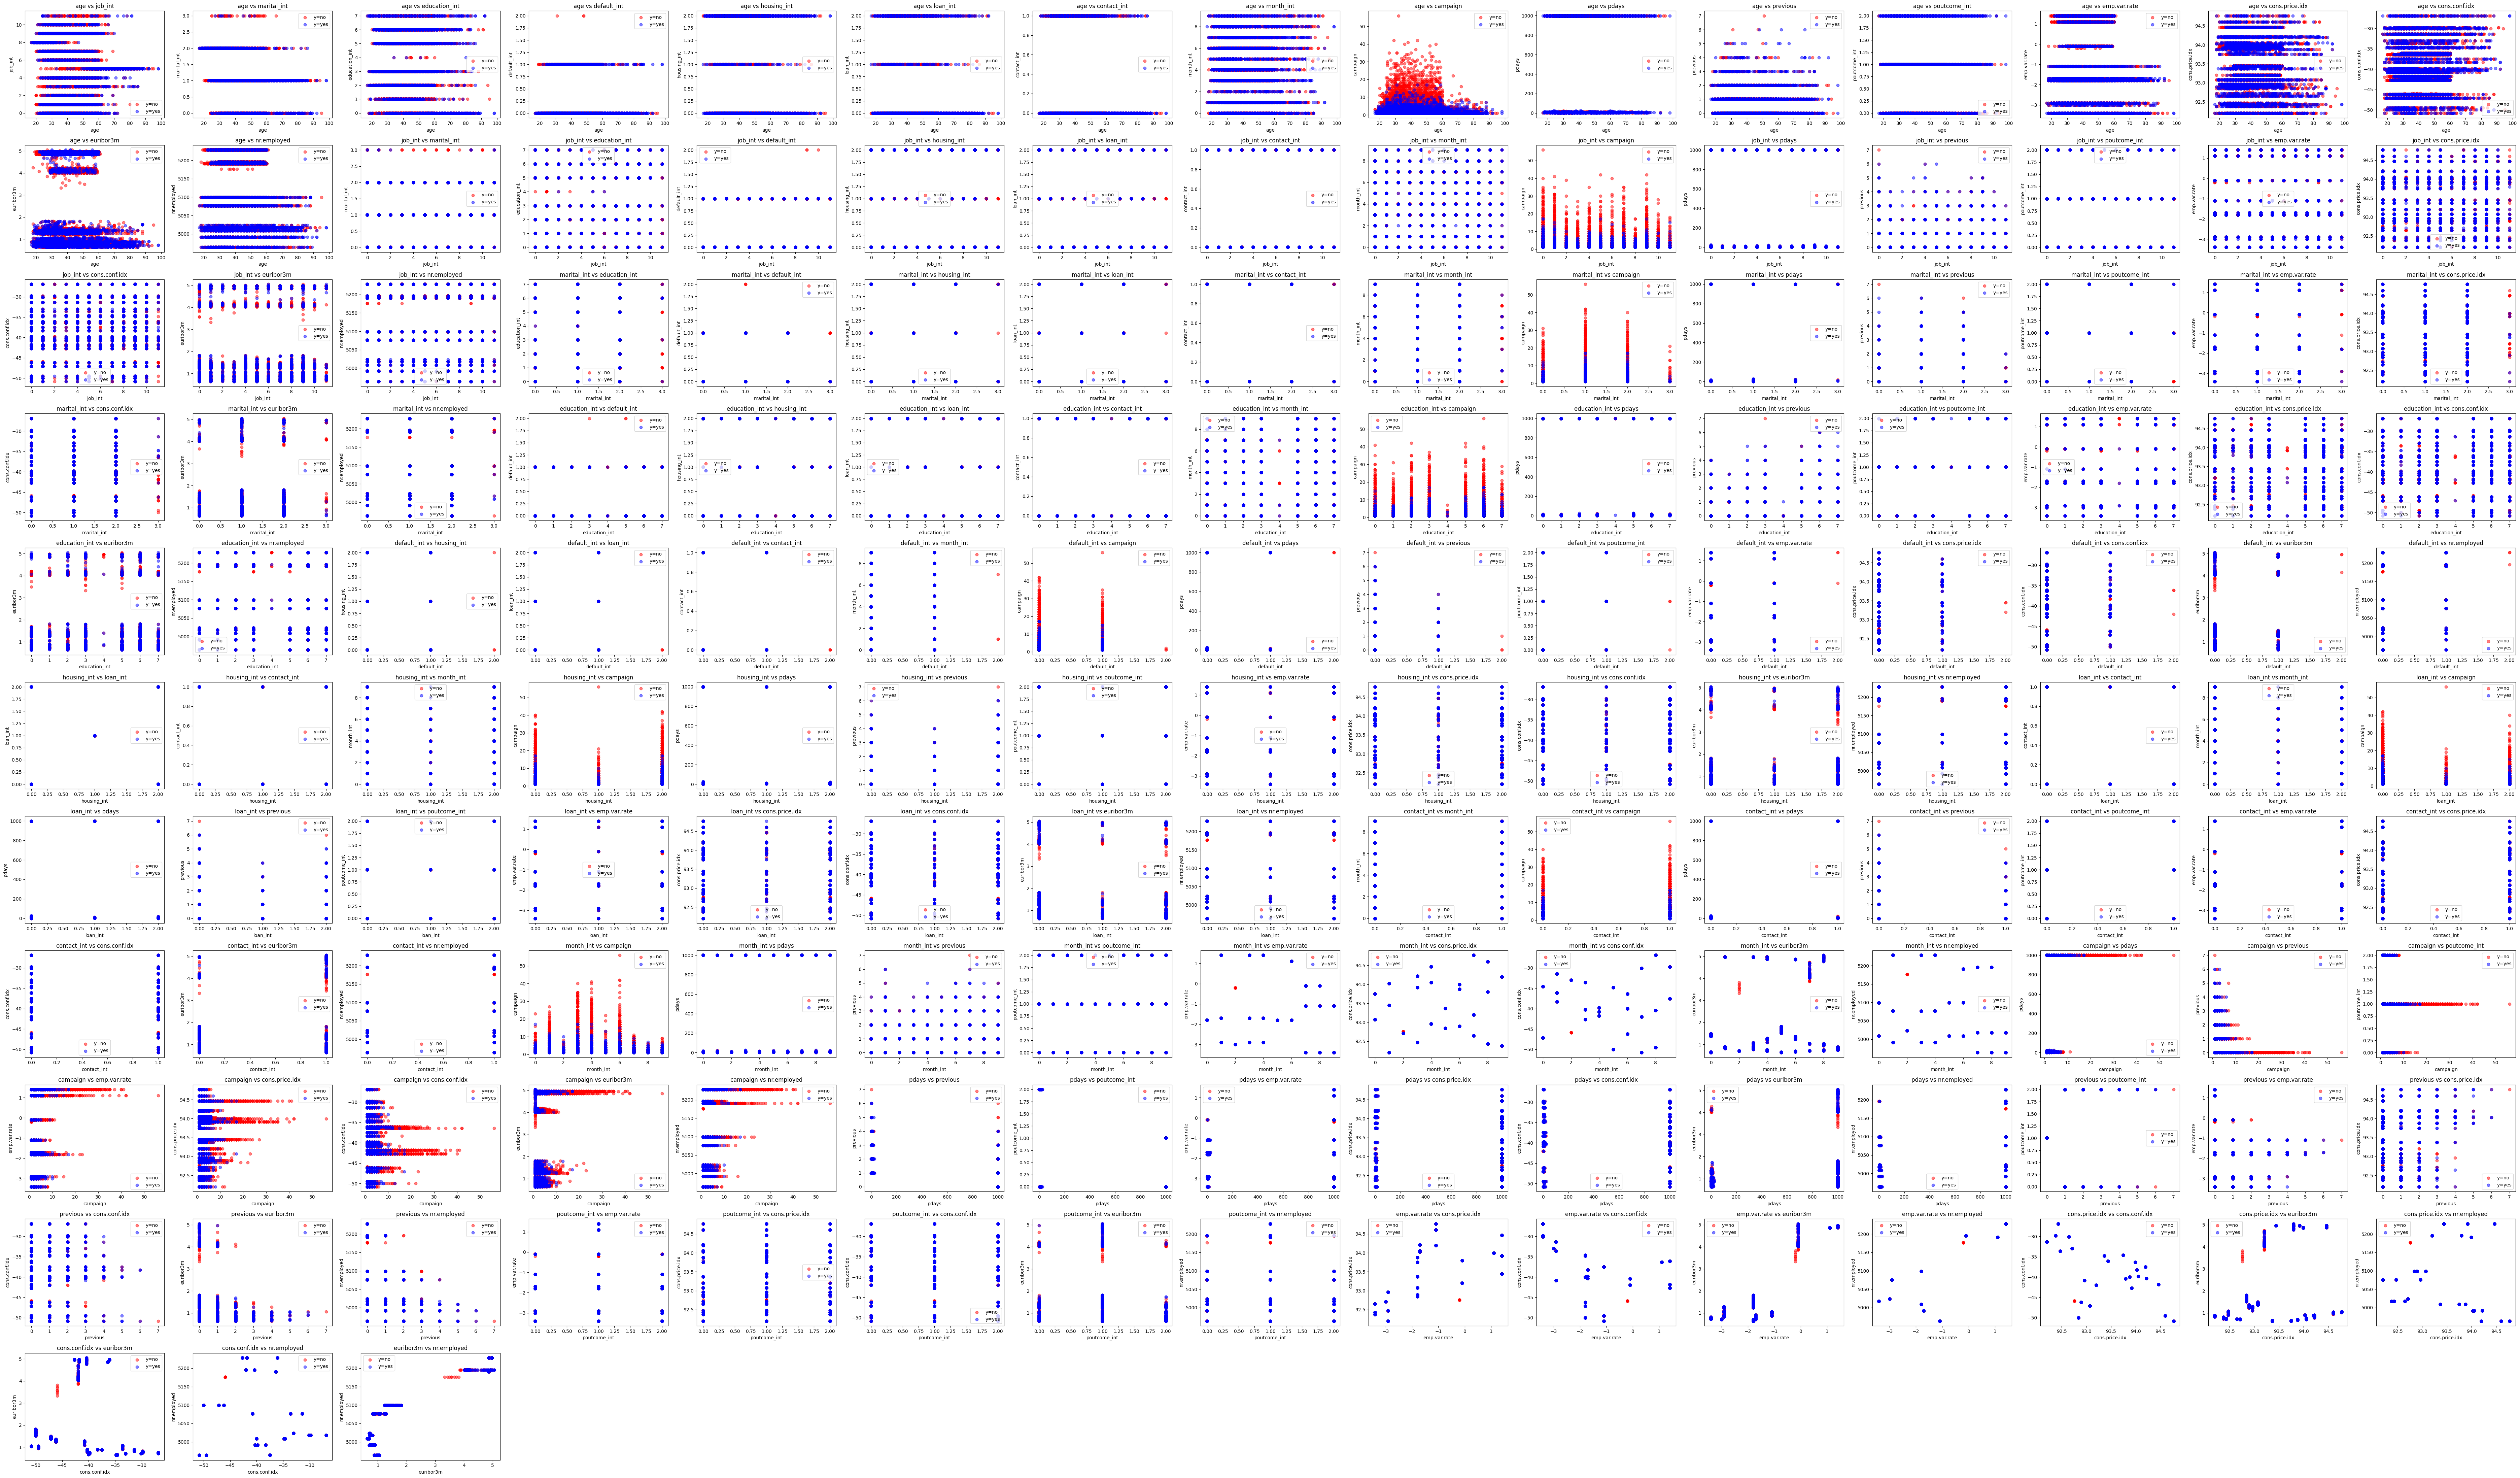

In [48]:
subs = campaign[['age', 'job_int', 'marital_int', 'education_int', 'default_int', 'housing_int', 'loan_int', 'contact_int',
            'month_int', 'campaign', 'pdays','previous','poutcome_int', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx','euribor3m','nr.employed']]
color_col = campaign['y']
columns = subs.columns
pairs = list(itertools.combinations(columns, 2))

# color based on the y output
my_colors = {'no': 'red', 'yes': 'blue'}

cols = 15
rows = (len(pairs) + cols - 1) // cols
work_percentage = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols,4 * rows))
axes = axes.flatten()

for i, (col1, col2) in enumerate(pairs):
    ax = axes[i]
    for y_value, color in my_colors.items():
        filtered = campaign.query("y == @y_value")
        ax.scatter(filtered[col1], filtered[col2],
            alpha = 0.5, label = f'y={y_value}', color = color)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(f'{col1} vs {col2}')
    ax.legend()

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()